"""<br>
@Author: Prayag Bhoir<br>
@Date: 01-10-2024<br>
@Last Modified by: Prayag Bhoir<br>
@Last Modified time: 01-10-2024<br>
@Title : Python programs on Multiple Linear Regression for predict profit of the company  based on different expenses for a given dataset <br>
"""

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pylab as plt

<h2>Load the dataset </h2>

In [3]:
url = 'https://drive.google.com/uc?export=download&id=1dic5dbHugytxCO6i9pcD6RPod_sLkAUA'
df = pd.read_csv(url)
#check the data
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.describe()


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<h2> Use encoding for categorical data</h2>


In [5]:
# Label encode the 'State' column
df_copy = df.copy()
label_encoder = LabelEncoder()
df_copy['State'] = label_encoder.fit_transform(df_copy['State'])
df_copy.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


<h2>Check the outliers and correlation</h2>

<Axes: >

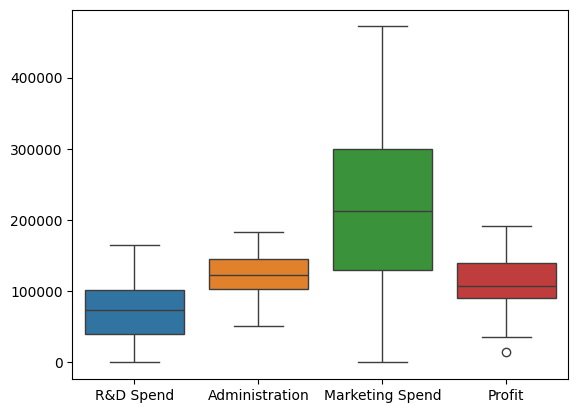

In [6]:
sns.boxplot(data=df)

<Axes: >

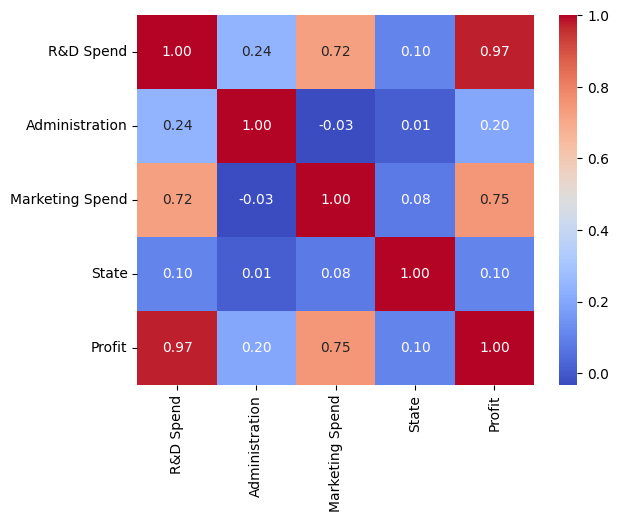

In [7]:
correlation_matrix = df_copy.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')

<h2>Observations</h2>
	<li>The profit feature has a strong correlation with R&D Spend and Marketing Spend</li>


<h2>Saperate the features</h2>


In [8]:
X = df_copy.drop(['Profit','State', 'Administration'], axis=1)
y = df_copy[['Profit']]
X.head(),y.head()

(   R&D Spend  Marketing Spend
 0  165349.20        471784.10
 1  162597.70        443898.53
 2  153441.51        407934.54
 3  144372.41        383199.62
 4  142107.34        366168.42,
       Profit
 0  192261.83
 1  191792.06
 2  191050.39
 3  182901.99
 4  166187.94)

<h2>Split the dataset into training and testing</h2>


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
display(X_test)
display(y_test)

,R&D Spend,Marketing Spend
13,91992.39,252664.93
39,38558.51,174999.30
30,61994.48,91131.24
45,1000.23,1903.93
17,94657.16,282574.31
48,542.05,0.00
26,75328.87,134050.07
25,64664.71,137962.62
32,63408.86,46085.25
19,86419.70,0.00


,Profit
13,134307.35
39,81005.76
30,99937.59
45,64926.08
17,125370.37
48,35673.41
26,105733.54
25,107404.34
32,97427.84
19,122776.86


<h2>Build the model</h2>

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<h2>Make prediction on test data.</h2>

In [12]:
y_pred = model.predict(X_test)

<h2>Accuracy matrics</h2>

In [13]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred)) # High mse cause we not scale.
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 67343832.58979604
R² Score: 0.9168381183550247


<h2>Visualize the model</h2>

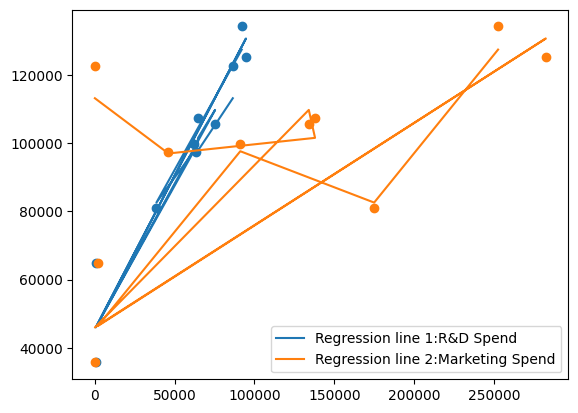

In [14]:
plt.scatter(x=X_test.iloc[:,0:1],y=y_test)
plt.scatter(x=X_test.iloc[:,1:2],y=y_test)
plt.plot(X_test,y_pred, label=['Regression line 1:R&D Spend','Regression line 2:Marketing Spend'])
plt.legend()
plt.show()


In [36]:
print(f"The predicted profit for 91992.39 R&D Spend ,252664.93 Marketing Spend is {model.predict([[91992.39,252664.93]])[0][0]} ")

The predicted profit for 91992.39 R&D Spend ,252664.93 Marketing Spend is 127521.38604122546


C:\Users\bhoir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
